# ML 101

## Regression

Regression belongs to the class of [Supervised Learning](https://en.wikipedia.org/wiki/Supervised_learning) tasks where the datasets that are used for predictive/statistical modeling contain [continuous labels](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/). But, let's define a regression problem more mathematically.

Let's consider the following image below:

 ![regression](https://raw.githubusercontent.com/mariolpantunes/ml101/main/figs/regression.png)

So, in the above image, $X$ is the set of values that correspond to the  the space of input values and $y$ is the output variables but note that these values are predicted by $h$. $h$ is the function that maps the $X$ values to $y$ (often called as predictor). For historical reasons, this $h$ is referred to as a hypothesis function.

Note that, the predicted values here are continuous in nature. So, your ultimate goal is, given a training set, to learn a function $h:X \rightarrow Y$ so that $h(x)$ is a "good" predictor for the corresponding value of $y$. Also, keep in mind that the domain of values that both $X$ and $Y$ accept are all real numbers and you can define it like this: $X=Y=\mathbb{R}$ where, $\mathbb{R}$ is the set of all real numbers.

A pair $(x^i, y^i)$ is called a training example. You can define the training set as $\{(x^i, y^i) ; i = 1,...,m\}$ (in case the training set contains $m$ instances and there is only one feature $x$ in the dataset).

A bit of mathematics there for you so that you don't go wrong even in the simplest of things. So, according to Han, Kamber, and Pei-

> In general, these methods are used to predict the value of a response (dependent) variable from one or more predictor (independent) variables, where the variables are numeric." - [Data Mining: Concepts and Techniques (3rd edn.)](https://www.sciencedirect.com/book/9780123814791/data-mining-concepts-and-techniques)



In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
import seaborn as sns
import numpy as np
import math

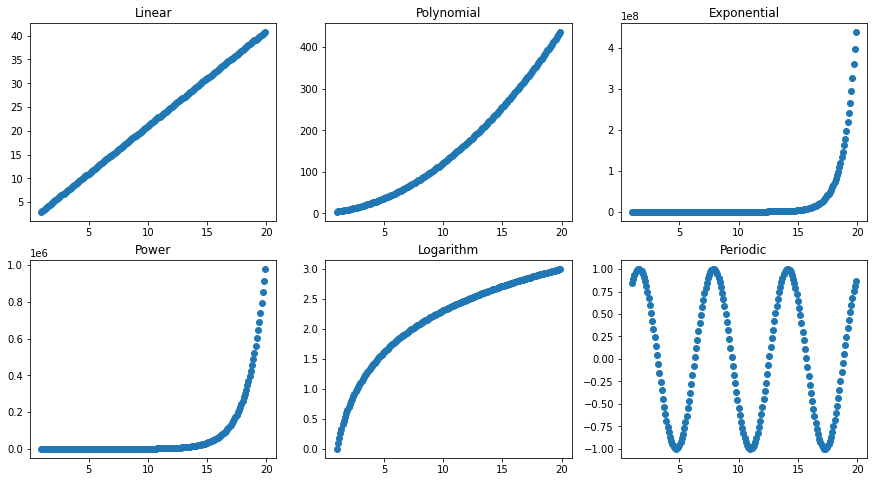

In [21]:
#create linear dataset
x = np.arange(start=1, stop=20, step=0.1)
x_long = np.arange(start=1, stop=30, step=0.1)
y_linear = x*2+1
y_poly = x**2+2*x+1
y_exp = math.e**x
y_pow = 2**x 
y_log = np.log(x)
y_sin = np.sin(x)

yys = [y_linear, y_poly, y_exp, y_pow, y_log, y_sin]
titles = ['Linear', 'Polynomial', 'Exponential', 'Power', 'Logarithm', 'Periodic']

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y, 'o')
  axs[r][c].set_title(titles[i])
plt.show()

## [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

LinearRegression fits a linear model with coefficients $w = (w_1,..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

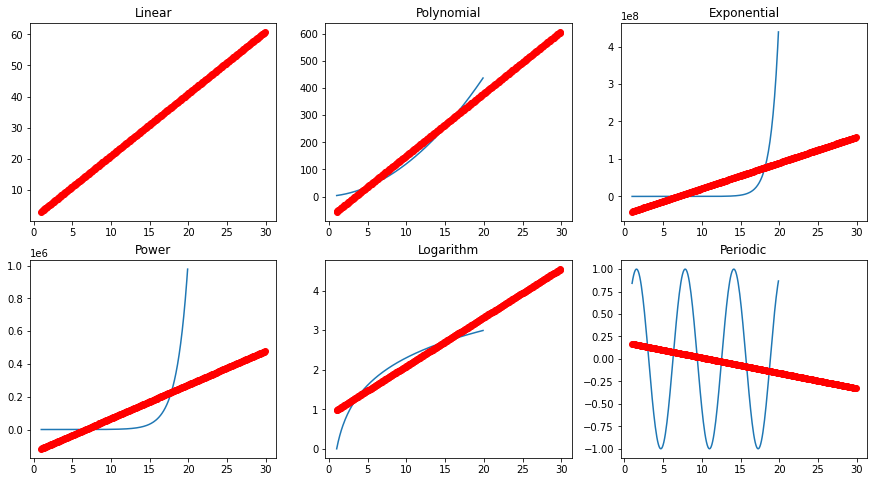

In [22]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = LinearRegression().fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()

## [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html)

Compared to the OLS (ordinary least squares) estimator, the coefficient weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the marginal log-likelihood of the observations.

We also plot predictions and uncertainties for Bayesian Ridge Regression for one dimensional regression using polynomial feature expansion. Note the uncertainty starts going up on the right side of the plot. This is because these test samples are outside of the range of the training samples.


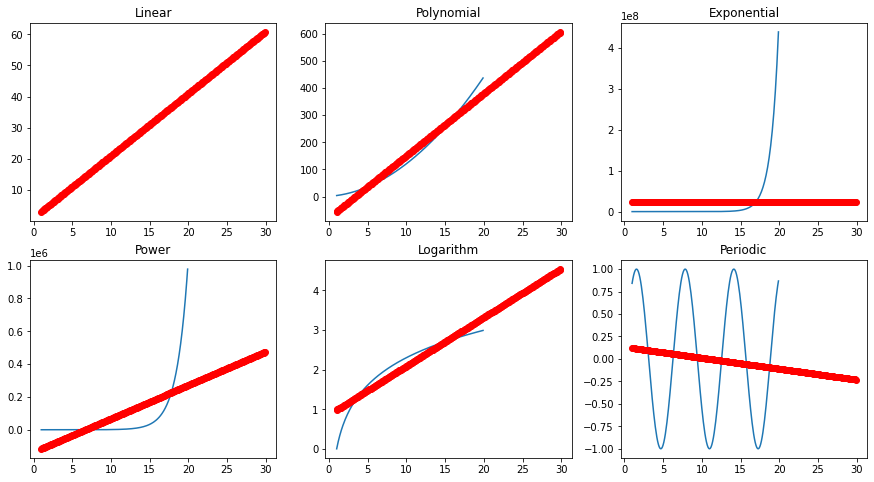

In [23]:
from sklearn.linear_model import BayesianRidge

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = BayesianRidge().fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()

## [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

Support Vector Machines (SVMs) are well known in classification problems. The use of SVMs in regression is not as well documented, however. These types of models are known as Support Vector Regression (SVR).

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

In contrast to OLS, the objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, ϵ (epsilon).

*italicized text*

Kernel: linear


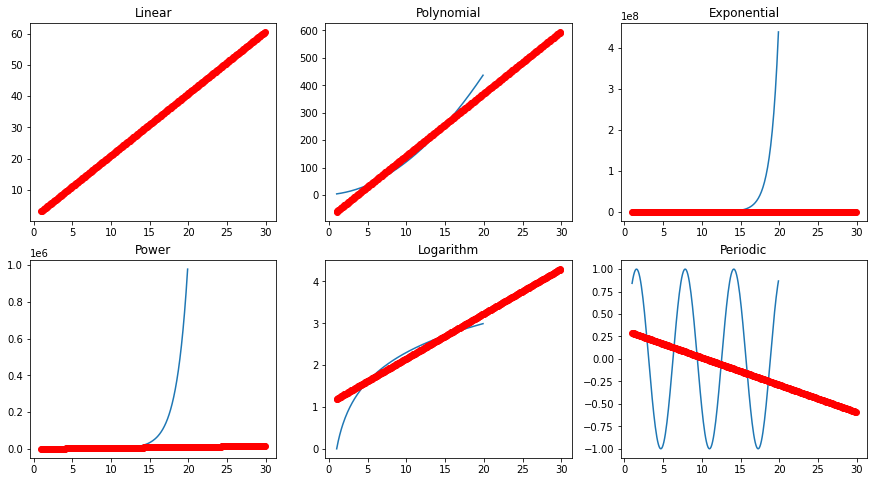

Kernel: poly


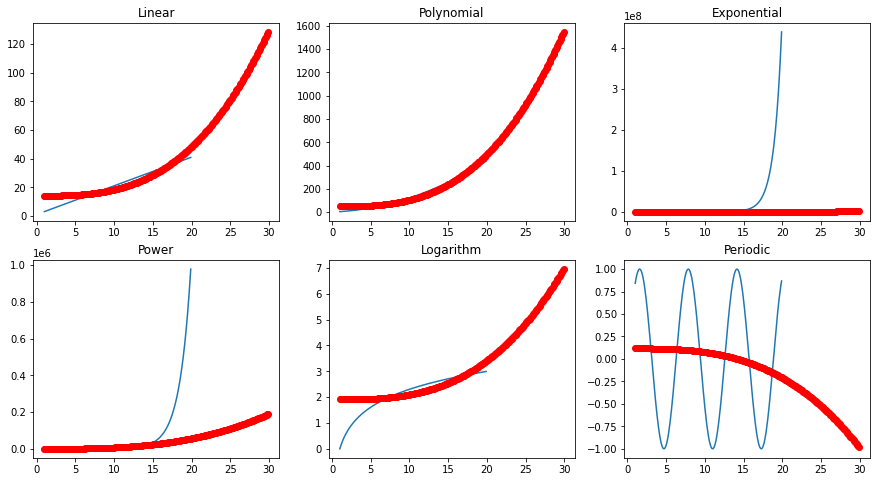

Kernel: rbf


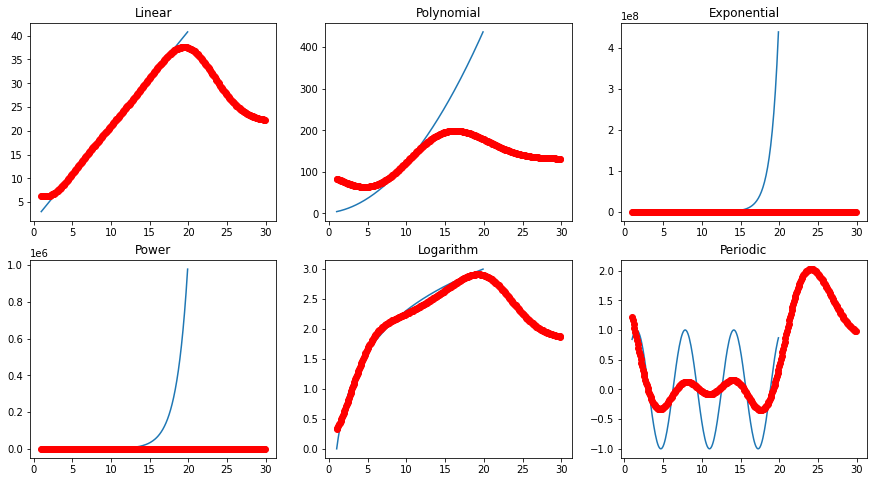

Kernel: sigmoid


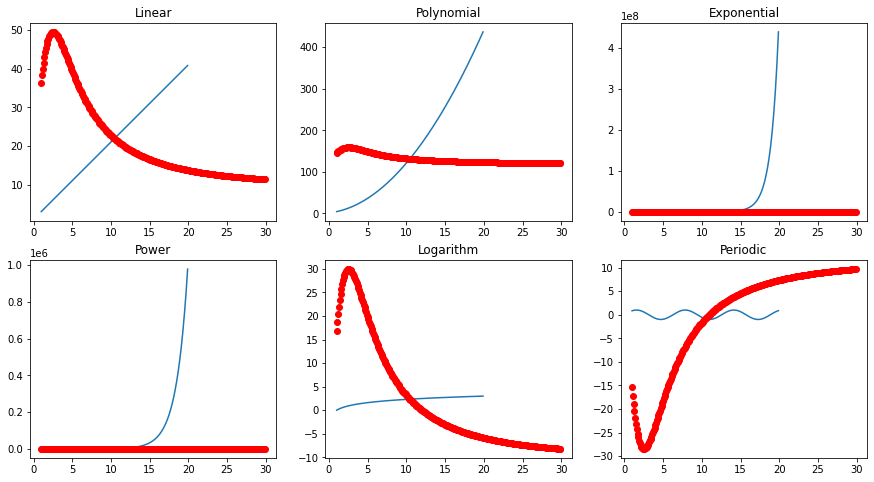

In [24]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in kernels:
  print(f'Kernel: {k}')
  fig, axs = plt.subplots(2, 3)

  for i in range(len(yys)):
    y = yys[i]
    r = int(i/3)
    c = int(i%3)

    axs[r][c].plot(x, y)
    axs[r][c].set_title(titles[i])

    reg = SVR(kernel=k).fit(x.reshape(-1, 1), y)
    y_hat = reg.predict(x_long.reshape(-1, 1))
    axs[r][c].plot(x_long, y_hat, 'ro')
  plt.show()

## [Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)




Activation: logistic


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


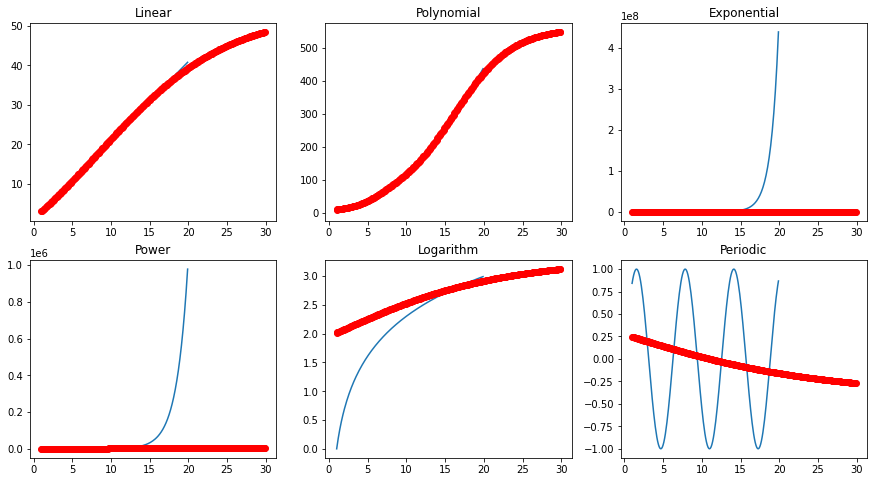

Activation: tanh


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


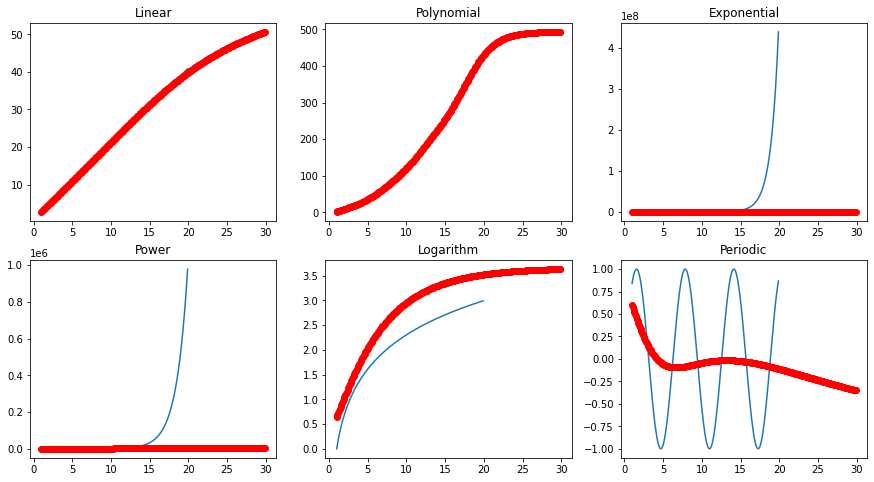

Activation: relu


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


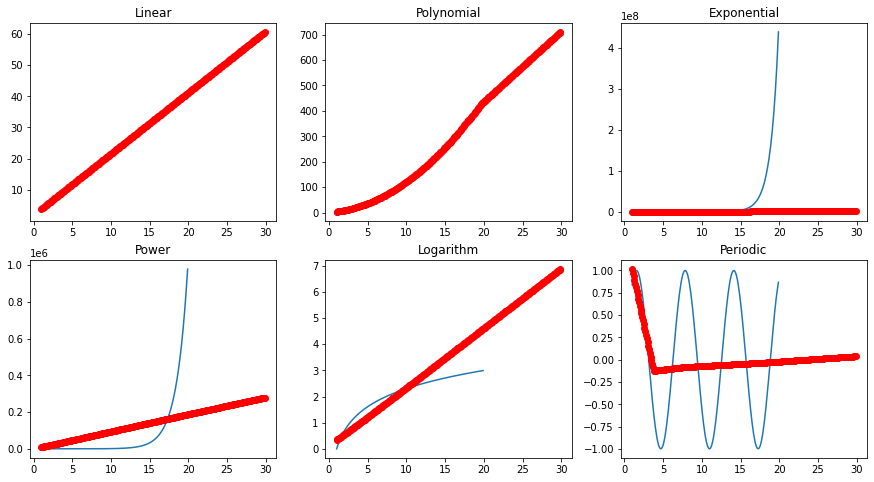

In [25]:
from sklearn.neural_network import MLPRegressor

activation = ['logistic', 'tanh', 'relu']

for a in activation:
  print(f'Activation: {a}')
  fig, axs = plt.subplots(2, 3)

  for i in range(len(yys)):
    y = yys[i]
    r = int(i/3)
    c = int(i%3)

    axs[r][c].plot(x, y)
    axs[r][c].set_title(titles[i])

    reg = MLPRegressor(activation=a, max_iter=10000, hidden_layer_sizes=(200,)).fit(x.reshape(-1, 1), y)
    y_hat = reg.predict(x_long.reshape(-1, 1))
    axs[r][c].plot(x_long, y_hat, 'ro')
  plt.show()

## [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation (we will see this later) to select the size that minimises the mean-squared error.

While the method is quite appealing, it quickly becomes impractical when the dimension increases, i.e., when there are many independent variables.

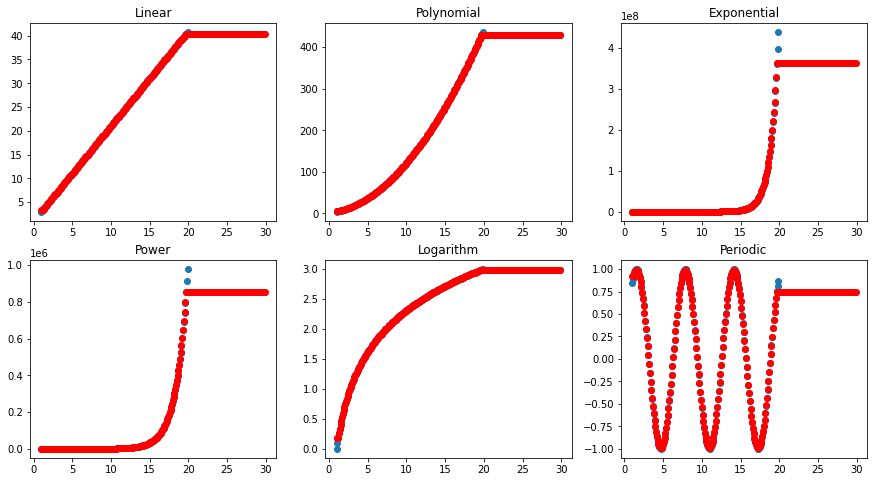

In [26]:
from sklearn.neighbors import KNeighborsRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y, 'o')
  axs[r][c].set_title(titles[i])

  reg = KNeighborsRegressor(n_neighbors=5).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()


# Decision Trees

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

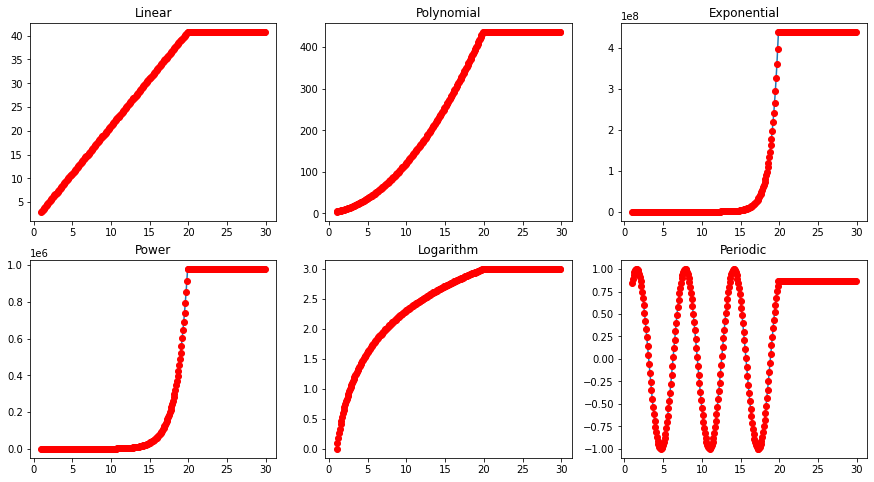

In [27]:
from sklearn.tree import DecisionTreeRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = DecisionTreeRegressor(max_depth=None).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()

## [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.

A Random Forest Regression model is powerful and accurate. It usually performs great on many problems, including features with non-linear relationships. Disadvantages, however, include the following: there is no interpretability, overfitting may easily occur, we must choose the number of trees to include in the model.


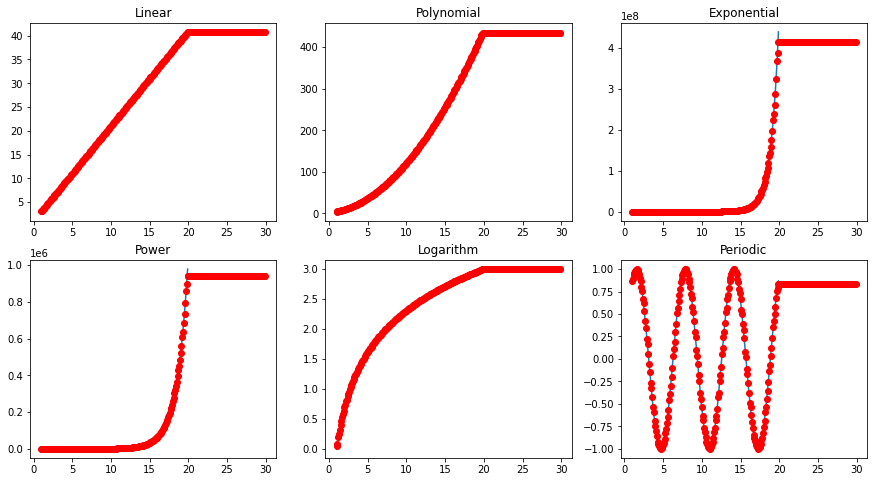

In [28]:
from sklearn.ensemble import RandomForestRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = RandomForestRegressor(n_estimators=200).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()

## [Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

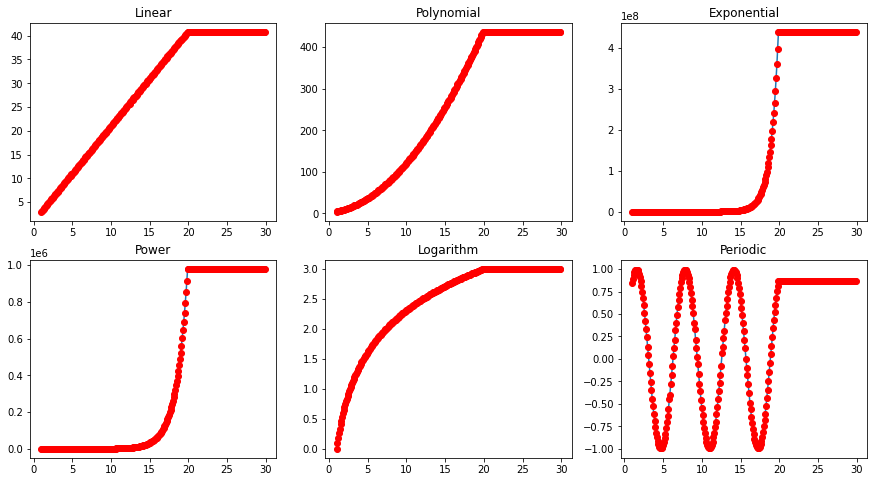

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = GradientBoostingRegressor(n_estimators=200).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()

## [Voting Ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html)

Prediction voting regressor for unfitted estimators.

A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.




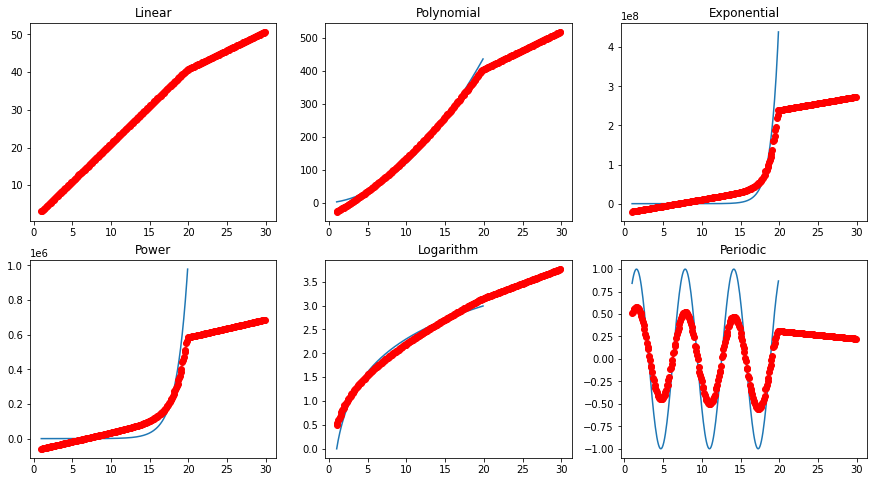

In [30]:
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)

fig, axs = plt.subplots(2, 3)

for i in range(len(yys)):
  y = yys[i]
  r = int(i/3)
  c = int(i%3)

  axs[r][c].plot(x, y)
  axs[r][c].set_title(titles[i])

  reg = VotingRegressor([('lr', r1), ('rf', r2)]).fit(x.reshape(-1, 1), y)
  y_hat = reg.predict(x_long.reshape(-1, 1))
  axs[r][c].plot(x_long, y_hat, 'ro')

plt.show()